In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm


In [4]:

def plot_mean_and_CI_with_marker(time_steps, mean, lb, ub, color_mean=None, color_shading=None, marker=None, marker_size=12):
    plt.fill_between(time_steps, ub, lb,
                     color=color_shading, alpha=.2)
    plt.plot(time_steps, mean, color_mean, marker=marker, markersize=marker_size, markevery=1000)


# Synthetic, Gaussian noise

In [5]:
all_regrets_1 = []
all_regrets_2 = []
all_regrets_3 = []
all_regrets_4 = []

min_len_1 = int(1e6)
min_len_2 = int(1e6)
min_len_3 = int(1e6)
min_len_4 = int(1e6)

f_max = 1
run_list = np.arange(10)
for itr in run_list:
    obs_noise = 0.3**2
    log_file_name = "results_bo/res_noise_var_" + str(obs_noise) + "_iter_" + str(itr) + ".pkl"
    res = pickle.load(open(log_file_name, "rb"))
    values = res["all"]["f_values"]
    values = np.squeeze(f_max - np.array(values))
    values_acc = np.cumsum(values)
    min_len_1 = np.min([min_len_1, len(values_acc)])
    all_regrets_1.append(values_acc)

    obs_noise = 0.4**2
    log_file_name = "results_bo/res_noise_var_" + str(obs_noise) + "_iter_" + str(itr) + ".pkl"
    res = pickle.load(open(log_file_name, "rb"))
    values = res["all"]["f_values"]
    values = np.squeeze(f_max - np.array(values))
    values_acc = np.cumsum(values)
    min_len_2 = np.min([min_len_2, len(values_acc)])
    all_regrets_2.append(values_acc)
    
    obs_noise = 0.3**2
    log_file_name = "results_quantum/res_noise_var_" + str(obs_noise) + "_iter_" + str(itr) + ".pkl"
    res = pickle.load(open(log_file_name, "rb"))
    values = res["all"]["f_values"]
    track_queries = res["all"]["track_queries"]
    values_new = []
    for i in range(len(values)):
        values_new += list(np.repeat(values[i], track_queries[i]))
    values = np.array(values_new)
    values = np.squeeze(f_max - np.array(values))
    values_acc = np.cumsum(values)
    min_len_3 = np.min([min_len_3, len(values_acc)])
    all_regrets_3.append(values_acc)
    
    obs_noise = 0.4**2
    log_file_name = "results_quantum/res_noise_var_" + str(obs_noise) + "_iter_" + str(itr) + ".pkl"
    res = pickle.load(open(log_file_name, "rb"))
    values = res["all"]["f_values"]
    track_queries = res["all"]["track_queries"]
    values_new = []
    for i in range(len(values)):
        values_new += list(np.repeat(values[i], track_queries[i]))
    values = np.array(values_new)
    values = np.squeeze(f_max - np.array(values))
    values_acc = np.cumsum(values)
    min_len_4 = np.min([min_len_4, len(values_acc)])
    all_regrets_4.append(values_acc)

all_regrets_1 = [a[:min_len_1] for a in all_regrets_1]
all_regrets_2 = [a[:min_len_2] for a in all_regrets_2]
all_regrets_3 = [a[:min_len_3] for a in all_regrets_3]
all_regrets_4 = [a[:min_len_4] for a in all_regrets_4]
    
all_regrets_1_np = np.array(all_regrets_1)
all_regrets_2_np = np.array(all_regrets_2)
all_regrets_3_np = np.array(all_regrets_3)
all_regrets_4_np = np.array(all_regrets_4)

all_regrets_1_np_mean = np.mean(all_regrets_1_np, axis=0)
all_regrets_2_np_mean = np.mean(all_regrets_2_np, axis=0)
all_regrets_3_np_mean = np.mean(all_regrets_3_np, axis=0)
all_regrets_4_np_mean = np.mean(all_regrets_4_np, axis=0)

all_regrets_1_np_stderr = np.std(all_regrets_1_np, axis=0) / (np.sqrt(len(run_list)))
all_regrets_2_np_stderr = np.std(all_regrets_2_np, axis=0) / (np.sqrt(len(run_list)))
all_regrets_3_np_stderr = np.std(all_regrets_3_np, axis=0) / (np.sqrt(len(run_list)))
all_regrets_4_np_stderr = np.std(all_regrets_4_np, axis=0) / (np.sqrt(len(run_list)))

all_regrets_1_np_ub = all_regrets_1_np_mean + all_regrets_1_np_stderr
all_regrets_1_np_lb = all_regrets_1_np_mean - all_regrets_1_np_stderr
all_regrets_2_np_ub = all_regrets_2_np_mean + all_regrets_2_np_stderr
all_regrets_2_np_lb = all_regrets_2_np_mean - all_regrets_2_np_stderr
all_regrets_3_np_ub = all_regrets_3_np_mean + all_regrets_3_np_stderr
all_regrets_3_np_lb = all_regrets_3_np_mean - all_regrets_3_np_stderr
all_regrets_4_np_ub = all_regrets_4_np_mean + all_regrets_4_np_stderr
all_regrets_4_np_lb = all_regrets_4_np_mean - all_regrets_4_np_stderr


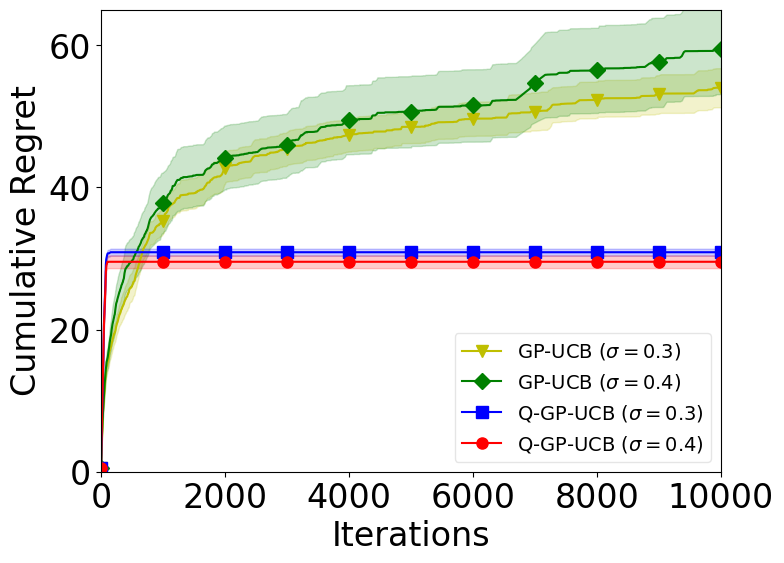

In [6]:

lw = 2.0
plt.rc('font', size=24)

plt.figure(figsize=(8, 6))
plt.rcParams["legend.framealpha"] = 0.5
plt.rcParams["legend.loc"] = "best"

color_list = ["y", "g", "b", "r"]
marker_list = ["v", "D", "s", "o"]

inds = np.arange(1, 1e6)
marker_size = 8
plot_mean_and_CI_with_marker(inds[:min_len_1], all_regrets_1_np_mean[:min_len_1], all_regrets_1_np_ub[:min_len_1], all_regrets_1_np_lb[:min_len_1], color_mean=color_list[0], color_shading=color_list[0], marker=marker_list[0], marker_size=marker_size)
plot_mean_and_CI_with_marker(inds[:min_len_2], all_regrets_2_np_mean[:min_len_2], all_regrets_2_np_ub[:min_len_2], all_regrets_2_np_lb[:min_len_2], color_mean=color_list[1], color_shading=color_list[1], marker=marker_list[1], marker_size=marker_size)
plot_mean_and_CI_with_marker(inds[:min_len_3], all_regrets_3_np_mean[:min_len_3], all_regrets_3_np_ub[:min_len_3], all_regrets_3_np_lb[:min_len_3], color_mean=color_list[2], color_shading=color_list[2], marker=marker_list[2], marker_size=marker_size)
plot_mean_and_CI_with_marker(inds[:min_len_4], all_regrets_4_np_mean[:min_len_4], all_regrets_4_np_ub[:min_len_4], all_regrets_4_np_lb[:min_len_4], color_mean=color_list[3], color_shading=color_list[3], marker=marker_list[3], marker_size=marker_size)

plt.legend((
    r"GP-UCB ($\sigma=0.3$)", \
    r"GP-UCB ($\sigma=0.4$)", \
    r"Q-GP-UCB ($\sigma=0.3$)", \
    r"Q-GP-UCB ($\sigma=0.4$)"), \
    prop={'size':14}
)

axes = plt.gca()
axes.set_xlim([0, 10000])
axes.set_ylim([-0.01, 65])


plt.ylabel("Cumulative Regret")
plt.xlabel("Iterations")

plt.show()

# Synthetic, Bernoulli noise

In [5]:
all_regrets_1 = []
all_regrets_2 = []

min_len_1 = int(1e6)
min_len_2 = int(1e6)

f_max = 1
run_list = np.arange(10)
for itr in run_list:
    log_file_name = "results_bo/res_iter_" + str(itr) + "_binary.pkl"
    res = pickle.load(open(log_file_name, "rb"))
    values = res["all"]["f_values"]
    values = np.squeeze(f_max - np.array(values))
    values_acc = np.cumsum(values)
    min_len_1 = np.min([min_len_1, len(values_acc)])
    all_regrets_1.append(values_acc)

    log_file_name = "results_quantum/res_iter_" + str(itr) + "_binary.pkl"
    res = pickle.load(open(log_file_name, "rb"))
    values = res["all"]["f_values"]
    track_queries = res["all"]["track_queries"]
    values_new = []
    for i in range(len(values)):
        values_new += list(np.repeat(values[i], track_queries[i]))
    values = np.array(values_new)
    values = np.squeeze(f_max - np.array(values))
    values_acc = np.cumsum(values)
    min_len_2 = np.min([min_len_2, len(values_acc)])
    all_regrets_2.append(values_acc)

all_regrets_1 = [a[:min_len_1] for a in all_regrets_1]
all_regrets_2 = [a[:min_len_2] for a in all_regrets_2]
    
all_regrets_1_np = np.array(all_regrets_1)
all_regrets_2_np = np.array(all_regrets_2)

all_regrets_1_np_mean = np.mean(all_regrets_1_np, axis=0)
all_regrets_2_np_mean = np.mean(all_regrets_2_np, axis=0)

all_regrets_1_np_stderr = np.std(all_regrets_1_np, axis=0) / (np.sqrt(len(run_list)))
all_regrets_2_np_stderr = np.std(all_regrets_2_np, axis=0) / (np.sqrt(len(run_list)))

all_regrets_1_np_ub = all_regrets_1_np_mean + all_regrets_1_np_stderr
all_regrets_1_np_lb = all_regrets_1_np_mean - all_regrets_1_np_stderr
all_regrets_2_np_ub = all_regrets_2_np_mean + all_regrets_2_np_stderr
all_regrets_2_np_lb = all_regrets_2_np_mean - all_regrets_2_np_stderr


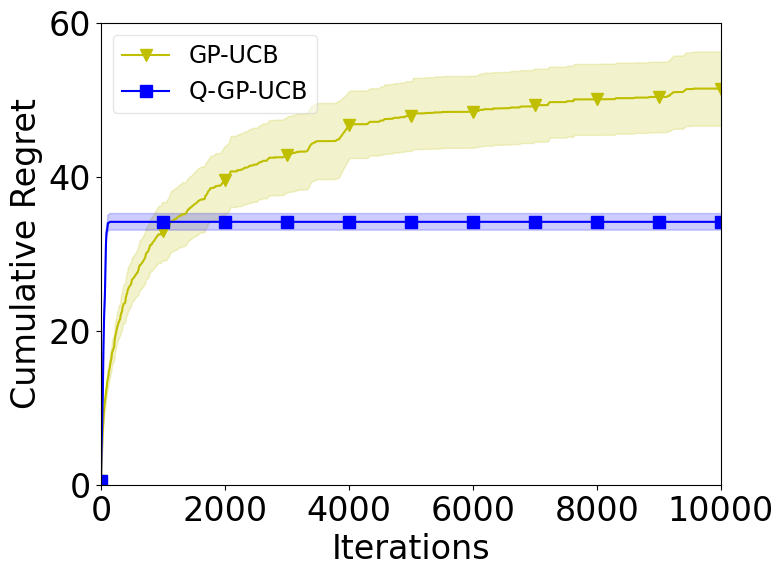

In [6]:

lw = 2.0
plt.rc('font', size=24)

plt.figure(figsize=(8, 6))
plt.rcParams["legend.framealpha"] = 0.5
plt.rcParams["legend.loc"] = "best"

color_list = ["y", "g", "b", "r"]
marker_list = ["v", "D", "s", "o"]

inds = np.arange(1, 1e6)
marker_size = 8
plot_mean_and_CI_with_marker(inds[:min_len_1], all_regrets_1_np_mean[:min_len_1], all_regrets_1_np_ub[:min_len_1], all_regrets_1_np_lb[:min_len_1], color_mean=color_list[0], color_shading=color_list[0], marker=marker_list[0], marker_size=marker_size)
plot_mean_and_CI_with_marker(inds[:min_len_2], all_regrets_2_np_mean[:min_len_2], all_regrets_2_np_ub[:min_len_2], all_regrets_2_np_lb[:min_len_2], color_mean=color_list[2], color_shading=color_list[2], marker=marker_list[2], marker_size=marker_size)

plt.legend((
    r"GP-UCB", \
    r"Q-GP-UCB"), \
prop={'size':17})

axes = plt.gca()
axes.set_xlim([0, 10000])
axes.set_ylim([-0.01, 60])

plt.ylabel("Cumulative Regret")
plt.xlabel("Iterations")

plt.show()
